# Computer Science 2XC3 - Graded Lab II

Please refer to the pdf for detailed instructions. The below file contains all the preliminary code you will need to work on the lab. You can copy paste instructions here to create one cohesive lab and organize it that best suits your teams workflow. 

In [22]:
import random
import timeit 
import matplotlib.pyplot as plt
import numpy as np
import math
from queue import LifoQueue as Stack
from queue import Queue
import networkx as nx

In [3]:
class GraphI:

    # using hash map
    def __init__(self, edges):
        self.graph = {}
        for x,y in edges:
            if x not in self.graph.keys():
                self.graph[x]=[]
            self.graph[x].append(y)

    def has_edge(self, src, dst):
        return src in self.graph[dst]

    def get_graph_size(self,):
        return len(self.graph)
    
    def get_graph(self,):
        return self.graph

    #Modified version of dfs function provided below.
    def depth_first_search(self, node, end_point=None):
        stack = [node]
        graph = self.get_graph()
        seen = set()

        while len(stack) !=0:
            node = stack.pop()
            if node not in seen:
                seen.add(node)
                if node in graph.keys():
                    for nn in graph[node]:
                        if nn == end_point:
                            return True
                        stack.append(nn)
        return False
    
    #part 1.3
    #directed graph
    def has_cycle(self):
        marked = set()

        for v in self.graph:
            if v not in marked:
                if self.depth_first_search(v,v):
                    return True
        return False
    #part 1.4
    #directed graph
    def is_connected(self, src, dst):
        return self.depth_first_search(src, dst)

In [4]:
#part 1.3 & 1.4 testing
g = GraphI([(0, 1), (1, 2), (2,0), (2, 3), (5, 4)])
#g = GraphI([(0, 1), (0, 2), (1, 2), (2, 3)])

print(g.has_cycle())

print(g.is_connected(5,4))

True
True


In [5]:
class GraphII:

    # using adjacency list
    def __init__(self, nodes):
        self.graph = []
        # node numbered 0-1
        for node in range(nodes):
            self.graph.append([])
        
    def has_edge(self, src, dst):
        return src in self.graph[dst]
    
    def add_edge(self,src,dst):
        if not self.has_edge(src,dst):
            self.graph[src].append(dst)
            self.graph[dst].append(src)
    
    def get_graph(self,):
        return self.graph
    
    #part 1.3
    #undirected graph
    def has_cycle_(self, v, marked, on_path):
        marked[v] = True
        
        for i in self.graph[v]:
            if not marked[i]:
                if self.has_cycle_(i, marked, v):
                    return True
            elif on_path != i:
                return True
        
        return False
    
    def has_cycle(self):
        marked = [False] * len(self.graph)
        
        for w in range(len(self.graph)):
            if not marked[w]:
                if self.has_cycle_(w, marked, -1):
                    return True
        
        return False
    
    #part 1.4
    #undirected graph
    def is_connected_(self, v, connected, marked):
        if v == connected:
            return True
        
        marked[v] = True
        
        for w in self.graph[v]:
            if not marked[w]:
                if self.is_connected_(w, connected, marked):
                    return True
        
        return False
    
    def is_connected(self, src, dst):
        marked = [False] * len(self.graph)
        
        return self.is_connected_(src, dst, marked)

In [6]:
#part 1.3 & 1.4 testing

graph = GraphII(6)
#graph.add_edge(0,1)
graph.add_edge(1,2)
graph.add_edge(1,3)
graph.add_edge(2,0)
graph.add_edge(2,3)
graph.add_edge(3,4)
# graph.add_edge(4,5)
# graph.add_edge(3,5)
print(graph.has_cycle())
print(graph.is_connected(4,2))

True
True


In [7]:
testgraph = GraphII(10)

testgraph.add_edge(1,2)

testgraph.add_edge(2,5)

testgraph.add_edge(5,9)

testgraph.add_edge(9,6)

print(testgraph.get_graph())


[[], [2], [1, 5], [], [], [2, 9], [9], [], [], [5, 6]]


In [8]:
def depth_first_search(G,node,end_point=None):
    stack = [node]
    graph = G.get_graph()
    seen=set()

    while len(stack) !=0:
        node = stack.pop()
        # search for neighbours in graph
        if node not in seen:
            seen.add(node)
            print("Visited node:" + str(node))
            # if the given node has an edge
            if node in graph.keys():
                # iterate over edges of node
                for nn in graph[node]:

                    # limited traversal
                    if nn == end_point:
                        return True
                    # add to stack
                    stack.append(nn)

In [9]:
#Breadth First Search
def breadth_first_search(G, node):
    stack = [node]
    graph = G.get_graph()
    seen=set()

    seen.add(node)

    while len(stack) > 0:
        node = stack[0]
        stack = stack[1:]
        print("Visiting node: " + str(node))
        if node in graph.keys():
            for nn in graph[node]:
                #if node == node2:
                #    return True
                if nn not in seen:
                    stack.append(nn)
                    seen.add(nn)

In [10]:
#Use the methods below to determine minimum vertex covers

def add_to_each(sets, element):
    copy = sets.copy()
    for set in copy:
        set.append(element)
    return copy

def power_set(set):
    if set == []:
        return [[]]
    return power_set(set[1:]) + add_to_each(power_set(set[1:]), set[0])

def is_vertex_cover(G, C):
    for start in G.adj:
        for end in G.adj[start]:
            if not(start in C or end in C):
                return False
    return True

def MVC(G):
    nodes = [i for i in range(G.get_size())]
    subsets = power_set(nodes)
    min_cover = nodes
    for subset in subsets:
        if is_vertex_cover(G, subset):
            if len(subset) < len(min_cover):
                min_cover = subset
    return min_cover


In [11]:
# Part 1.1

# DFS2

# DFS2 Helper
def paths_dfs(g: GraphII, s: int):
    def dfsp(v):
        marked[v] = True

        for w in g.graph[v]:
            if not marked[w]:
                edge_to[w] = v
                dfsp(w)
    # end dfsp

    vcount = len(g.get_graph())
    marked = [False] * vcount
    edge_to = [-1] * vcount

    dfsp(s)

    return edge_to

def DFS2(g: GraphII, s, v):

    edge_to = paths_dfs(g, s)
    if edge_to[v] == -1:
        return []

    p = Stack()     # construct the path backwards
    x = v
    while x != s:
        p.put(x)        # put = push
        x = edge_to[x]
    p.put(s)            # put = push

    path = []       # dump it out into an array
    while not p.empty():
        path.append(p.get(False))   # get = pop

    return path

# BFS2

# BFS2 Helper
def paths_bfs(g: GraphII, s: int):
    vcount = len(g.get_graph())
    marked = [False] * vcount
    edge_to = [-1] * vcount
    open = Queue()
    count = 0

    marked[s] = True
    open.put(s)

    while not open.empty():
        v = open.get(False)
        for w in g.graph[v]:
            if not marked[w]:
                edge_to[w] = v
                marked[w] = True
                open.put(w)

    return edge_to

def BFS2(g: GraphII, s, v):
    edge_to = paths_bfs(g, s)
    if edge_to[v] == -1:
        return []

    p = Stack()     # construct the path backwards
    x = v
    while x != s:
        p.put(x)        # put = push
        x = edge_to[x]
    p.put(s)            # put = push

    path = []       # dump it out into an array
    while not p.empty():
        path.append(p.get(False))   # get = pop

    return path

print(paths_bfs(testgraph,1))
# print(DFS2(testgraph, 1,6))
# print(BFS2(testgraph, 1,6))

[-1, -1, 1, -1, -1, 2, 9, -1, -1, 5]


In [12]:
# Part 1.2

def BFS3(g: GraphII, s):
    outputdict = {}
    vcount = len(g.get_graph())
    bfsoutput = paths_bfs(g,s)
    for i in range(vcount):
        if (bfsoutput[i] != -1):
            outputdict[i] = bfsoutput[i]
    return outputdict

def DFS3(g: GraphII, s):
    outputdict = {}
    vcount = len(g.get_graph())
    dfsoutput = paths_dfs(g,s)
    for i in range(vcount):
        if (dfsoutput[i] != -1):
            outputdict[i] = dfsoutput[i]
    return outputdict

print(BFS3(testgraph,1))
print(DFS3(testgraph,1))


{2: 1, 5: 2, 6: 9, 9: 5}
{2: 1, 5: 2, 6: 9, 9: 5}


### 1.5 


In [24]:
import random

def generate_random_graph(n, e):
    graph = GraphII(n)
    for _ in range(e):
        node_source = random.randint(0, n-1)
        edge_dist = random.randint(0, n-1)
        graph.add_edge(node_source, edge_dist)
    return graph

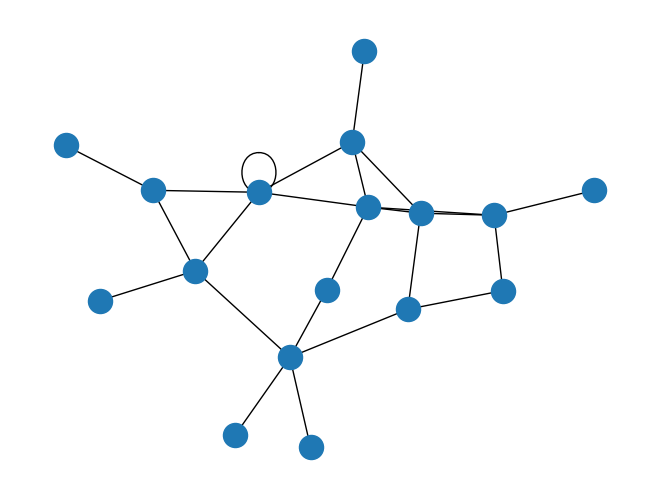

In [25]:
import networkx as nx

def plot_graph(graph):
    G = nx.Graph()
    for node, adj in enumerate(graph):
        for dst in adj:
            G.add_edge(node, dst)
    nx.draw(G)
    plt.show()


random_graph = generate_random_graph(20, 30)

plot_graph(random_graph.get_graph())

## 1.6


In [26]:
def count_cycles(n, e, x):
    count = 0
    for _ in range(x):
        random_graph = generate_random_graph(n, e)
        if random_graph.has_cycle():
            count += 1
    percent = (count / x) * 100
    return percent


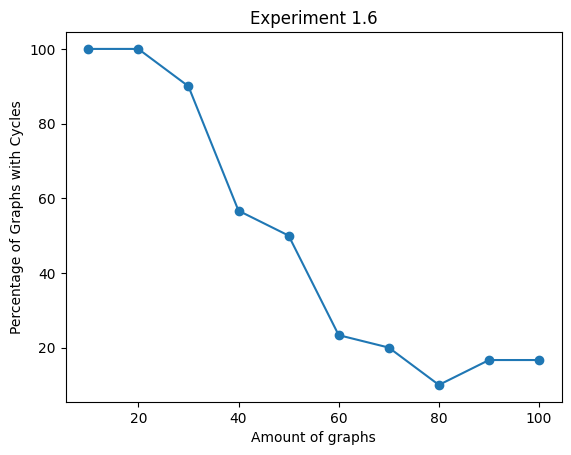

In [ ]:
def experiment(start, end, step, n, e):
    percentages = []
    for i in range(start, end + 1, step):
        percentages.append(count_cycles(i, n, e))
    return percentages

percentages = experiment(10, 100, 10, 20, 30)

# Plotting
plt.plot(range(10, 100 + 1, 10), percentages, marker='o')
plt.xlabel('Amount of graphs')
plt.ylabel('Percentage of Graphs with Cycles')
plt.title('Experiment 1.6')
plt.show()

## 1.7

In [ ]:
def is_connected(graph):
    # dfs approach 
    stack = [0] 
    visited = set()
    
    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            for neighbor in graph.get_graph()[node]:
                stack.append(neighbor)
    return len(visited) == len(graph.get_graph())

def count_connection(n, e, x):
    count = 0
    for _ in range(x):
        g = generate_random_graph(n, e)
        if is_connected(g):
            count += 1
    percent = (count / x) * 100
    return percent


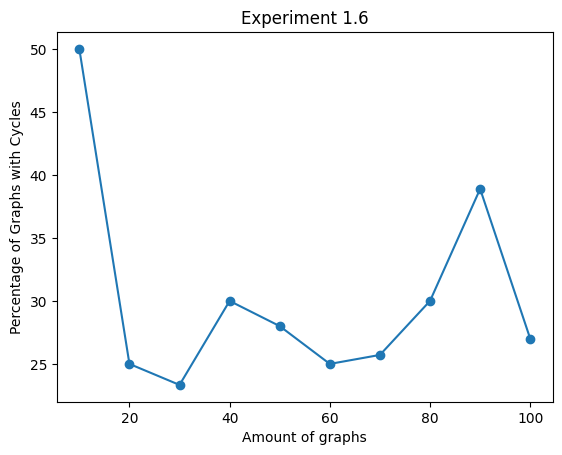

In [ ]:
def experimentCountted(start, end, step, n, e):
    percentages = []
    for x in range(start, end + 1, step):
        percentages.append(count_connection(n, e, x))
    return percentages

percentages = experimentCountted(10, 100, 10, 20, 30)


plt.plot(range(10, 100 + 1, 10), percentages, marker='o')
plt.xlabel('Amount of graphs')
plt.ylabel('Percentage of Graphs with Cycles')
plt.title('Experiment 1.6')
plt.show()

# Reflection 

### 1.6 Experiment  

The 1.6 experiment above compares the perctange of occurence of cycles in graphs over a range. It does the experiment with 10,20,30,40...100 graphs generated and computes the perctanges of which cycles have occured. An obvious trend is present when looking the the plotted graph. As the amount of graphs increase, the percentage of cycles decrease. 
This may be because the number of edges and number of nodes remains the same throughout the experiment. As the number of graphs increases, the random generated graph needs to compute multiple ways of creating graphs with n nodes and e edges. Since there are only a few possible amount of graphs that can be made with n nodes and e edges, the rest will not include cycles.   

An observation to support the findings is expalined below:  

When creating 10 graphs, with 20 nodes and 30 edges, the percentages for different test cases were 100%, 90%, 100%. This suggests that there are atleast 10 different ways to create graphs with cycles with 20 nodes and 30 edges.   

When creating 100 graphs, with 20 nodes and 30 edges, the percentages for different test cases were 30%, 27% 25%. This suggests that there may be 30 different ways to create graphs with cycles. The number of cycles in this is greater than the number with 10 graphs, percentage wise it is significantly less since it runs out of possible combinations  

### 1.7 Experiment  

The 1.7 experiment above compares the perctange of occurence of connections in graphs over a range. It does the experiment with 10,20,30,40...100 graphs generated and computes the perctanges of which connections have occured. An obvious trend is present when looking at the plotted graph. As the amount of graphs increase, the percentage of connections remains the constant with the range of 16% to 40%. 

It is observed that as the amount of graphs increases, the range fluctuations decreases. This suggests that as there are more samples, we can get better results. It can be assumed that with a higher value, we may expect a more accurate range of percentages. 


### Part 2

In [19]:
# Part 2.1
def Approx1(G):
    C = set()
    graph = G.get_graph()

    while graph: 
        max_degree = -1
        max_vertex = None

        for vertex, neighbors in enumerate(graph):
            degree = len(neighbors)
            if degree > max_degree:
                max_degree = degree
                max_vertex = vertex

        if max_vertex is not None:
            C.add(max_vertex)
            for neighbor in graph[max_vertex]:
                graph[neighbor].remove(max_vertex)
            graph[max_vertex] = []

            del graph[max_vertex]  

    return C

graph = GraphII(5)
graph.add_edge(0, 1)
graph.add_edge(0, 2)
graph.add_edge(1, 3)
graph.add_edge(2, 3)
graph.add_edge(3, 4)

vertex_cover = Approx1(graph)
print("Approximate MVC:", vertex_cover)

Approximate MVC: {0, 3}


In [47]:
import random

def Approx2(G):
    C = set()
    graph = G.get_graph()

    while graph:
        vertex_index = random.randint(0, len(graph) - 1)
        vertex_neighbors = graph[vertex_index]
        
        if vertex_neighbors:
            C.add(vertex_index)
           
            for neighbor in vertex_neighbors:
                graph[neighbor].remove(vertex_index)
                graph[vertex_index] = []
        else:
            del graph[vertex_index]

    return C


graph = GraphII(5)
graph.add_edge(0, 1)
graph.add_edge(0, 2)
graph.add_edge(1, 3)
graph.add_edge(2, 3)
graph.add_edge(3, 4)

vertex_cover = Approx2(graph)
print("Approximate MVC:", vertex_cover)


Approximate MVC: {1, 2, 3, 4}


In [21]:
import copy

def Approx3(graph):
    G = GraphII(len(graph.get_graph()))
    for node, edges in enumerate(graph.get_graph()):
        for neighbor in edges:
            G.add_edge(node, neighbor)

    C = set()

    while any(G.get_graph()):
        u = random.randint(0, len(G.get_graph()) - 1)
        if not G.get_graph()[u]:
            continue
        v = random.choice(G.get_graph()[u])

        C.add(u)
        C.add(v)

        for neighbor in list(G.get_graph()[u]):
            G.get_graph()[neighbor].remove(u)
            G.get_graph()[u].remove(neighbor)
        for neighbor in list(G.get_graph()[v]):
            G.get_graph()[neighbor].remove(v)
            G.get_graph()[v].remove(neighbor)

    return C

graph = GraphII(5)
graph.add_edge(0, 1)
graph.add_edge(0, 2)
graph.add_edge(1, 3)
graph.add_edge(2, 3)
graph.add_edge(3, 4)

min_vertex_cover = Approx3(graph)
print("Minimum vertex cover:", min_vertex_cover)

Minimum vertex cover: {0, 1, 3, 4}


In [1]:
# Part 2.4
# edge_sizes = [1,5,10,15,20]

# for e in edge_sizes:
#     mvcsum
#     for i in range(100):
#         random_graph = generate_random_graph(6, e)

In [18]:
# Part 2.5

def is_independent_set(G, set):
    for node1 in set:
        for node2 in set:
            if node1 != node2 and G.has_edge(node1, node2):
                return False
    return True

def MIS(G):
    vertices = [i for i in range(len(G.get_graph()))]
    all_subsets = power_set(vertices)

    max_independent_set = set()
    for subset in all_subsets:
        if is_independent_set(G, subset):
            if len(subset) > len(max_independent_set):
                max_independent_set = subset 

    return max_independent_set

graph = GraphII(4)
graph.add_edge(0, 1)
graph.add_edge(1, 2)
graph.add_edge(0, 3)

max_independent_set = MIS(graph)
print("Maximum Independent Set:", max_independent_set)

Maximum Independent Set: [3, 2]
